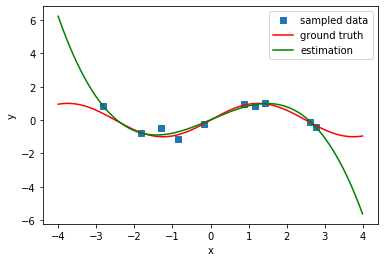

In [20]:
# 線形回帰問題
import numpy as np
import matplotlib.pyplot as plt

class Lenear_regression:
    def __init__(self):
        # data number
        self.n = 10
        # noise
        self.omega = 2 * np.pi * 0.2
        self.noise = 0.2 * np.random.randn(self.n, 1)
        # dataset
        self.xdata = 1.5 * np.random.randn(self.n, 1)
        self.ydata = np.sin(self.omega * self.xdata) + self.noise
        # true data
        self.xTrue = np.arange(-4, 4, 0.01)
        self.yTrue = np.sin(self.omega * self.xTrue)
        
    def mldivide(self, A, b):
        # 擬似逆行列
        piA = np.linalg.pinv(A)
        # x = A^-1 * b
        return np.dot(piA, b)
    
    def estimate(self, dim):
        # 切片は1, 残りは各次元の値(x, x^2, x^3...etc)
        X   = np.concatenate([np.ones((self.n, 1))] + [self.xdata ** i for i in range(1, dim)], axis = 1)
        XT  = np.vstack([np.ones((self.xTrue.shape[0]))] + [self.xTrue ** i for i in range(1, dim)]).T
        PX  = X[:, :p + 2]
        Hat = self.mldivide(PX, self.ydata)
        res = np.dot(XT[:,:p + 2], Hat)

        return res
    
    def DrowGraph(self, res):
        plt.plot(self.xdata, self.ydata, 's', label='sampled data')
        plt.plot(self.xTrue, self.yTrue, 'red', label='ground truth')
        plt.plot(self.xTrue, res, 'green', label='estimation')
        plt.legend()
        plt.xlabel('x')
        plt.ylabel('y')

lr = Lenear_regression()
# dimentional number 
dim = 4
# simulation
res = lr.estimate(dim)
lr.DrowGraph(res)

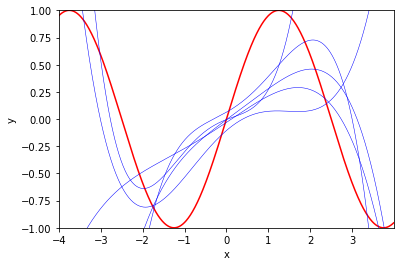

In [21]:
# リッジ回帰
import numpy as np
import matplotlib.pyplot as plt

class Ridge_regression:
    def __init__(self):
        # data number
        self.n = 10
        # noise
        self.omega = 2 * np.pi * 0.2
        self.noise = 0.2 * np.random.randn(self.n, 1)
        # dataset
        self.xdata = 1.5 * np.random.randn(self.n, 1)
        self.ydata = np.sin(self.omega * self.xdata) + self.noise
        # true data
        self.xTrue = np.arange(-4, 4, 0.01)
        self.yTrue = np.sin(self.omega * self.xTrue)
        
    def mldivide(self, A, b):
        # 擬似逆行列
        piA = np.linalg.pinv(A)
        # x = A^-1 * b
        return np.dot(piA, b)
        
    def estimate(self, dim):
        # noise
        omega = 2 * np.pi * 0.2
        noise = 0.2 * np.random.randn(self.n, 1)
        # dataset
        x = 1.5 * np.random.randn(self.n, 1)
        y = np.sin(omega * x) + noise

        PX = np.concatenate([np.ones((self.n, 1))] + [x ** i for i in range(1, dim + 1)], axis=1)

        lam = 10.0
        Hat = np.dot(PX.T, PX)  + lam * self.mldivide(np.eye(dim + 1), np.dot(PX.T,y));        
        Hat = self.mldivide(np.dot(PX.T, PX)  + lam * np.eye(dim + 1), np.dot(PX.T,y));     
        XT  = np.vstack([np.ones((self.xTrue.shape[0]))] + [self.xTrue ** i for i in range(1, dim + 1)]).T

        return np.dot(XT, Hat)  

        
    def DrowGraph(self, trial, dim, res):
        plt.figure(1)
        plt.plot(self.xTrue, self.yTrue,'red')
        plt.xlim(np.min(self.xTrue), np.max(self.xTrue))
        plt.ylim(np.min(self.yTrue), np.max(self.yTrue))

        for t in range(trial):
            plt.plot(self.xTrue, self.estimate(dim), 'blue', linewidth=0.5)
        plt.xlabel('x')
        plt.ylabel('y')
        

rr = Ridge_regression()
# dimentional number 
dim = 4
# trial number
trial = 5
# simulation
rr.DrowGraph(trial, dim, res)